# Networks

Networks are another important data structure in transportaiton.  Think roadway networks in particular, but many things can be represented as a network.  We'll go over a few basics in class. 

MPOs or DOTs with a travel model will maintain a network representation of the street network for use in the model.  This will have the attributes the model needs: free flow speed, capacity, length, directionality, turn restrictions, facility type, etc.  Usually, the best way to get a copy is to call up your friendly local transportation modeler and ask.  Even in this tech-crazy world, it is amazing how far asking politely will get you...

...however, that's not what we're going to do here.  Instead, we are going to work with network data from OpenStreetMap: 

http://www.openstreetmap.org/

To make it easier, we will work with a package called OSMnx, by Geoff Boeing. You can read a paper on the toolkit here: 

https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

And a blog post here: 

http://geoffboeing.com/2016/11/osmnx-python-street-networks/


### Homework

Your homework is to: 

1. Read the network paper linked above. 

2. Use the blog post to figure out how to install and use the package. 

3. Get the street network for Lexington.  

4. Print the basic_stats for the network. 

5. Calculate and show the shortest path from your home (or another point of interest) to UK campus.  Is this the route you would take?  What is the same or different?

6. Repeat step 5 for three other trips that you make regularly.  

 

In [34]:
import osmnx as ox
import networkx as nx

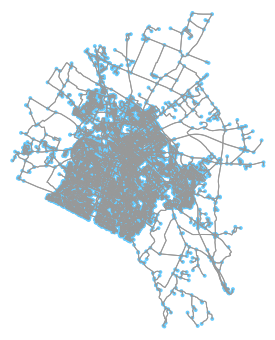

(<Figure size 439.495x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fb62ccee48>)

In [18]:
Lex = ox.graph_from_place('Fayette County, Kentucky', network_type = 'drive')
ox.plot_graph(Lex)

In [19]:
#Basic stats for the network

ox.basic_stats(Lex, circuity_dist = 'euclidean')

{'n': 11018,
 'm': 26914,
 'k_avg': 4.885460156108187,
 'intersection_count': 8279,
 'streets_per_node_avg': 2.681339626066437,
 'streets_per_node_counts': {0: 0,
  1: 2739,
  2: 41,
  3: 6279,
  4: 1911,
  5: 47,
  6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24859321110909421,
  2: 0.003721183517879833,
  3: 0.5698856416772554,
  4: 0.17344345616264295,
  5: 0.004265746959520784,
  6: 9.07605736068252e-05},
 'edge_length_total': 4711430.7780000055,
 'edge_length_avg': 175.05501887493517,
 'street_length_total': 2657711.103000011,
 'street_length_avg': 178.53762615880765,
 'street_segments_count': 14886,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 105736.9846485394,
 'self_loop_proportion': 0.011332392063610017,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

In [21]:
#Lex_Proj = ox.project_graph(Lex)

In [75]:
home = (38.045497, -84.514990)
campus = (38.037486, -84.507554)

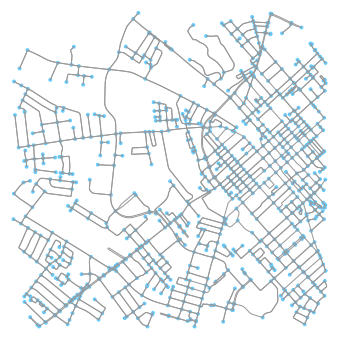

(<Figure size 547.843x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fb442af0b8>)

In [102]:
net = ox.graph_from_point(home, distance = 2100, network_type = 'drive')
ox.plot_graph(net)

In [103]:
net_projected = ox.project_graph(net)

In [104]:
home_node = ox.get_nearest_node(net, home, method='euclidean')
campus_node = ox.get_nearest_node(net, campus, method='euclidean')
print(home_node, campus_node)

163430893 163568242


In [105]:
shortest_path_tocampus = nx.shortest_path(G=net, source = home_node, target = campus_node, weight = 'length')
print(shortest_path_tocampus)

[163430893, 4132080254, 163428538, 163428555, 163530694, 3202202642, 163476046, 163476055, 163454416, 163568242]


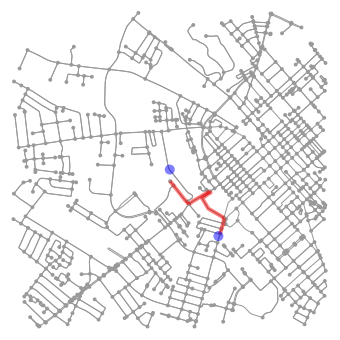

In [106]:
fig, ax = ox.plot_graph_route(net, shortest_path_tocampus, origin_point=home, destination_point=campus)

The route is similar to the route I would take except my trip to campus and ends exactly on the bus stop I take.
The only difference is that I use the Angliana Ave instead of Curry Ave to prior to joining S. Broadway

[163430893, 4132080254, 163432247, 4053971069, 163432116, 163432344]


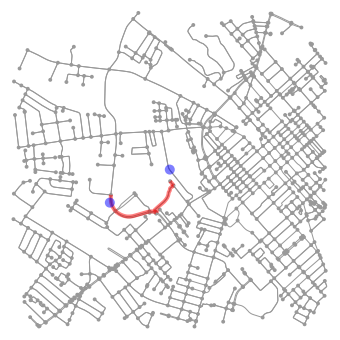

In [107]:
redmile = (38.041514, -84.524159)
redmile_node = ox.get_nearest_node(net, redmile, method='euclidean')
shortest_path_toredmile = nx.shortest_path(G=net, source = home_node, target = redmile_node, weight = 'length')
print(shortest_path_toredmile)

fig, ax = ox.plot_graph_route(net, shortest_path_toredmile, origin_point=home, destination_point=redmile)

[163430893, 4132080254, 163428538, 163428555, 163530694, 3202202642, 163440042, 5151780698, 163519614, 163529415, 163524218, 163510378, 163527918, 163476017]


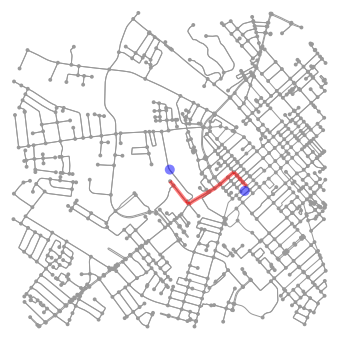

In [108]:
Target = (38.042926, -84.503527)
Target_node = ox.get_nearest_node(net, Target, method='euclidean')
shortest_path_totarget = nx.shortest_path(G=net, source = home_node, target = Target_node, weight = 'length')
print(shortest_path_totarget)

fig, ax = ox.plot_graph_route(net, shortest_path_totarget, origin_point=home, destination_point=Target)

[163430893, 4132080254, 163432247, 2631983565, 163430076, 163430056, 163430019, 163465916, 163465919, 163465922, 163482570, 163525758, 3664772934, 3664772933, 163522874, 163522869, 4005107621, 4005107618, 4005107619, 163579488]


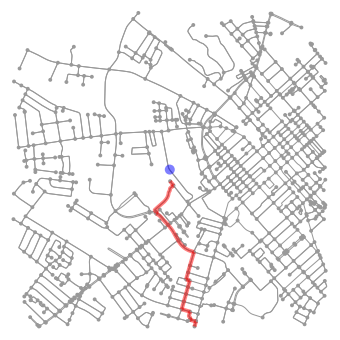

In [109]:
Shawnetown_Apt = (38.019958, -84.510230)
Shawnetown_node = ox.get_nearest_node(net, Shawnetown_Apt, method='euclidean')
shortest_path_toshawnetown = nx.shortest_path(G=net, source = home_node, target = Shawnetown_node, weight = 'length')
print(shortest_path_toshawnetown)

fig, ax = ox.plot_graph_route(net, shortest_path_toshawnetown, origin_point=home, destination_point=Shawnetown_Apt)